In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve

**Importing the dataset**

In [4]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df["Gender"]=df[["Gender"]].apply(preprocessing.LabelEncoder().fit_transform)

**Splitting the dataset into the Training set and Test set**

In [10]:
features=df.drop("Purchased",axis=1)
target=df["Purchased"]
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=5)


**Feature Scaling**

In [11]:
scaler=StandardScaler()
strain=scaler.fit_transform(x_test)
stest=scaler.transform(x_test)

**Fitting K-NN to the Training set**

In [16]:
df.corr()
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [18]:
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1])

**Making the Confusion Matrix**

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

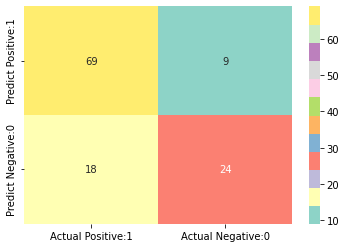

In [22]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, cmap='Set3')

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84        78
           1       0.73      0.57      0.64        42

    accuracy                           0.78       120
   macro avg       0.76      0.73      0.74       120
weighted avg       0.77      0.78      0.77       120



In [27]:
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy:\n",acc)
acc = roc_auc_score(y_test, y_pred)
print("Train set auc:\n",acc)
plot_roc_curve(knn, x_test, y_test)